                                                                                          GUEDIRA Oussama - GAUDRON Baptiste

# Dynamically solving the TSP

The main objective of this session is to implement Held-Karp’s algorithm to solve the Traveling Salesman Problem

### Defining the data structure to represent nodes and set of nodes

- Nodes are defined as integers numbered from 0 to n-1 according to the order of the list.
- As for the subsets of nodes, an efficient way to encode them is to use a binary encoding
    i.e for a given subset if the node k belongs to this subset the kth digit of the binary encoding is set to 1.

### Held-Karp’s algorithm

In [84]:
import itertools

import numpy as np

def held_karp(graph):
    """
    Implement Held-Karp’s algorithm
    
    
    """
    n = graph.number_of_nodes()

    # dict indexed by subsets S without 0 and destination j
    # with node subsets are encoded as bits.
    C = {}
    
    #get the matrix of distances
    dists = nx.attr_matrix(graph, edge_attr='distance',rc_order=range(n))
    
    # Initialisation
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0,k],0)

    # Iterate and store the length of increasing subsets and each node
    for size in range(2, n):
        for subset in itertools.combinations(range(1, n), size):
            # Encoding the subset 
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            # Find the node with minimal cost to the previous subset
            for k in subset:
                prev = bits & ~(1 << k)

                res = []
                for m in subset:
                    if m == k:
                        continue
                    res.append((C[(prev, m)][0] + dists[m,k], m))
                C[(bits, k)] = min(res)

    # The subset with all nodes from 1 to n-1
    final_bits = (2**n - 1) - 1

    # Find the cost of the shortest path
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k,0], k))
    opt, parent = min(res)

    # Find optimal path
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    # Add start state
    path.append(0)

    return opt, list(reversed(path))

### Testing the algorithm

Let's create a function to get the graph from coordinates of a file.

In [62]:
import networkx as nx

def distance(pos1,pos2):
    return ((pos1[0]-pos2[0])**2 + (pos1[1]-pos2[1])**2)**0.5

def graph_from_file(path):
    G=nx.Graph()
    with open(path) as data_file:
        nb_vertices = int(data_file.readline())
        nb=0
        for line in data_file:
            G.add_node(nb,pos=tuple(float(x) for x in line.split()))
            nb+=1
    for i in range(nb_vertices):
        for j in range(i):
            G.add_edge(i,j,distance = distance(G.nodes[i]['pos'],G.nodes[j]['pos']))
    return G


Let's get the optimal path for the example files :

For the 5 first cities the length of the tour is 8387.077130278542 with the optimal path [0, 2, 3, 4, 1]
For the 10 first cities the length of the tour is 12349.980743996226 with the optimal path [0, 4, 3, 2, 6, 8, 7, 9, 5, 1]
For the 15 first cities the length of the tour is 19269.93599779425 with the optimal path [0, 1, 5, 9, 10, 11, 14, 13, 12, 8, 6, 2, 3, 7, 4]


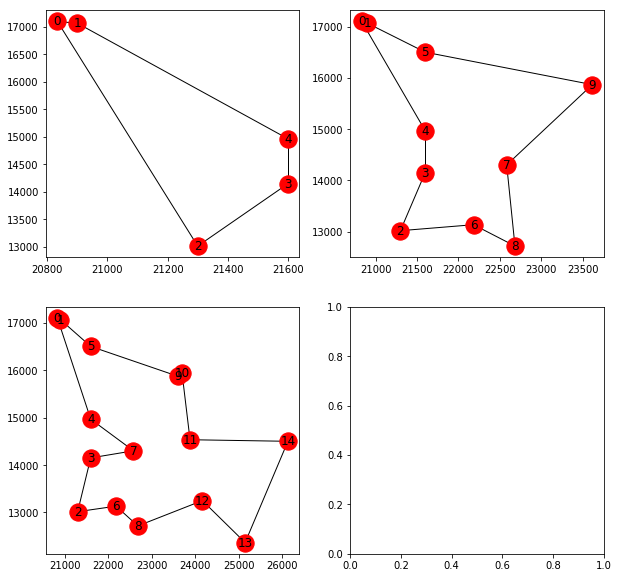

In [107]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,10))
nb_graph = 0
for n in [5,10,15]:
    
    # create graph from file
    G=graph_from_file(f'tsp{n}.txt')
    
    # get optimal path
    dist, path = held_karp(G)
    print(f'For the {n} first cities the length of the tour is {dist} with the optimal path {path}')
    
    # draw optimal graph
    edgelist = [(path[i],path[(i+1)%n]) for i in range(n)]
    nx.draw_networkx(G,ax=axs[nb_graph//2,nb_graph%2],pos=nx.get_node_attributes(G,'pos'),edgelist = edgelist)
    nb_graph += 1